In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install --upgrade pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
start = '2011-01-01'
end = '2022-09-23'

df = data.DataReader('^NSEI', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,6178.549805,6147.200195,6177.450195,6157.600098,0.0,6157.600098
2011-01-04,6181.049805,6124.399902,6172.750000,6146.350098,0.0,6146.350098
2011-01-05,6141.350098,6062.350098,6141.350098,6079.799805,0.0,6079.799805
2011-01-06,6116.149902,6022.299805,6107.000000,6048.250000,0.0,6048.250000
2011-01-07,6051.200195,5883.600098,6030.899902,5904.600098,0.0,5904.600098


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-19,17667.199219,17429.699219,17540.650391,17622.250000,258300.0,17622.250000
2022-09-20,17919.300781,17744.400391,17770.400391,17816.250000,263100.0,17816.250000
2022-09-21,17838.699219,17663.599609,17766.349609,17718.349609,245500.0,17718.349609
2022-09-22,17722.750000,17532.449219,17609.650391,17629.800781,284100.0,17629.800781
2022-09-23,17642.150391,17291.650391,17593.849609,17327.349609,390800.0,17327.349609


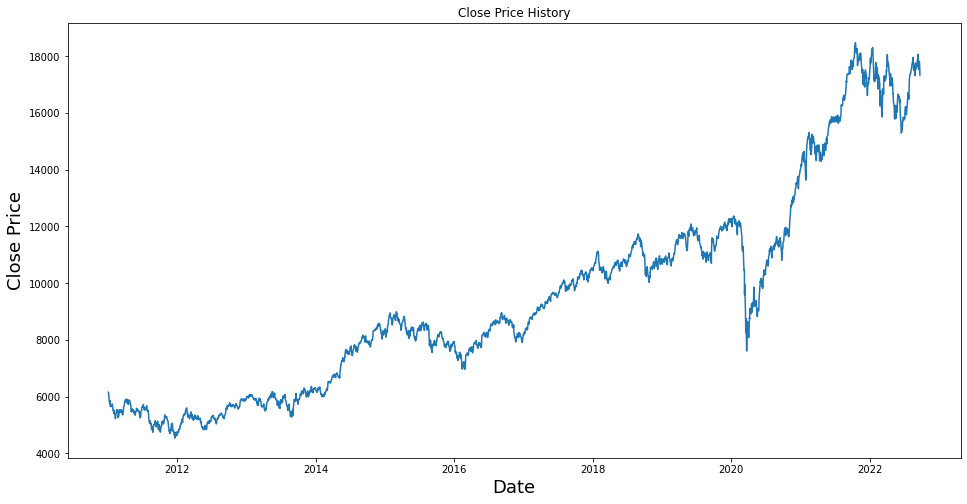

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,6178.549805,6147.200195,6177.450195,6157.600098,0.0,6157.600098
1,2011-01-04,6181.049805,6124.399902,6172.750000,6146.350098,0.0,6146.350098
2,2011-01-05,6141.350098,6062.350098,6141.350098,6079.799805,0.0,6079.799805
3,2011-01-06,6116.149902,6022.299805,6107.000000,6048.250000,0.0,6048.250000
4,2011-01-07,6051.200195,5883.600098,6030.899902,5904.600098,0.0,5904.600098


In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,6178.549805,6147.200195,6177.450195,6157.600098,0.0
1,6181.049805,6124.399902,6172.750000,6146.350098,0.0
2,6141.350098,6062.350098,6141.350098,6079.799805,0.0
3,6116.149902,6022.299805,6107.000000,6048.250000,0.0
4,6051.200195,5883.600098,6030.899902,5904.600098,0.0


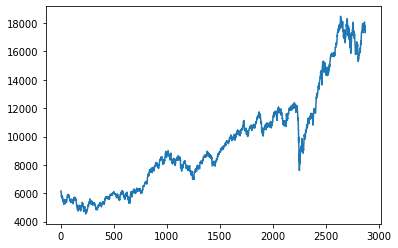

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2867    16681.685518
2868    16689.464014
2869    16694.197002
2870    16699.469502
2871    16702.052002
Name: Close, Length: 2872, dtype: float64

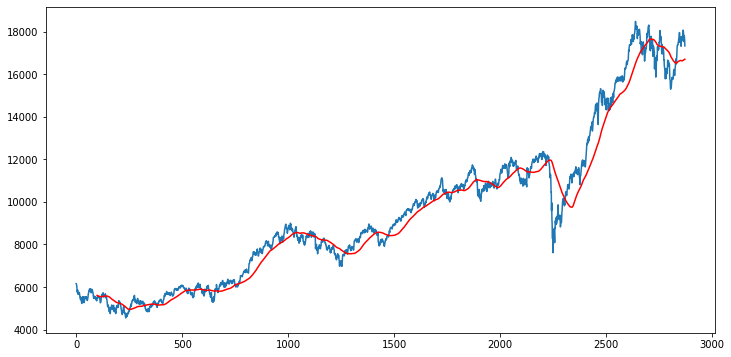

In [ ]:
plt.figure( figsize = (12,6) )
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2867    16984.240005
2868    16987.486753
2869    16989.070249
2870    16991.235757
2871    16993.311255
Name: Close, Length: 2872, dtype: float64

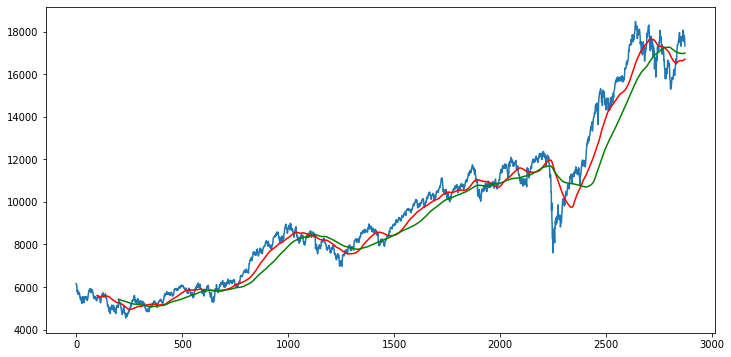

In [ ]:
plt.figure( figsize = (12,6) )
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2872, 5)

In [ ]:
#splitting data for training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2010, 1)
(862, 1)


In [ ]:
data_training.head()

,Close
0,6157.600098
1,6146.350098
2,6079.799805
3,6048.250000
4,5904.600098


In [ ]:
data_testing.head()

,Close
2010,11570.000000
2011,11669.150391
2012,11713.200195
2013,11643.950195
2014,11598.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))    #object creation

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.22426087],
       [0.22269713],
       [0.21344671],
       ...,
       [0.94658966],
       [0.96452052],
       [0.95921074]])

In [ ]:
x_train = [] #first 100 days , called steps/features
y_train = [] #predictive class that is 101th day

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i - 100: i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ml model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
len(df.columns)

5

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 55)

Epoch 1/55
60/60 [==============================] - 15s 176ms/step - loss: 0.0474
Epoch 2/55
60/60 [==============================] - 11s 190ms/step - loss: 0.0098
Epoch 3/55
60/60 [==============================] - 10s 173ms/step - loss: 0.0086
Epoch 4/55
60/60 [==============================] - 11s 177ms/step - loss: 0.0069
Epoch 5/55
60/60 [==============================] - 10s 175ms/step - loss: 0.0068
Epoch 6/55
60/60 [==============================] - 11s 182ms/step - loss: 0.0072
Epoch 7/55
60/60 [==============================] - 11s 179ms/step - loss: 0.0059
Epoch 8/55
60/60 [==============================] - 11s 180ms/step - loss: 0.0063
Epoch 9/55
60/60 [==============================] - 10s 175ms/step - loss: 0.0071
Epoch 10/55
60/60 [==============================] - 10s 170ms/step - loss: 0.0056
Epoch 11/55
60/60 [==============================] - 11s 186ms/step - loss: 0.0052
Epoch 12/55
60/60 [==============================] - 11s 180ms/step - loss: 0.0053
Epoch 13/55
6

In [ ]:
model.save('keras_modell.h5')

In [ ]:
#now for prediction analysis we will head for testing


In [ ]:
data_testing.head()

,Close
2010,11570.000000
2011,11669.150391
2012,11713.200195
2013,11643.950195
2014,11598.000000


In [ ]:
#for predicting 1710 i need previous 100 days value which are present in my training data

In [ ]:
data_training.tail(100)

,Close
1910,10198.400391
1911,10386.599609
1912,10380.450195
1913,10553.000000
1914,10524.000000
...,...
2005,11521.049805
2006,11456.900391
2007,11354.250000
2008,11483.250000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()


,Close
0,10198.400391
1,10386.599609
2,10380.450195
3,10553.000000
4,10524.000000


In [ ]:
#again we have to scale the data btw 0 to 1

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(962, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(862, 100, 1)
(862,)


In [ ]:
#making predictions

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(862, 1)

In [ ]:
#since the values were scale down now i have to find the factor by which they were scaled down to again scale them up

scaler.scale_

array([9.20234041e-05])

In [ ]:
scale_factor = 1 / 9.20234041e-05

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

377304.1486660041

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

475.803996521377

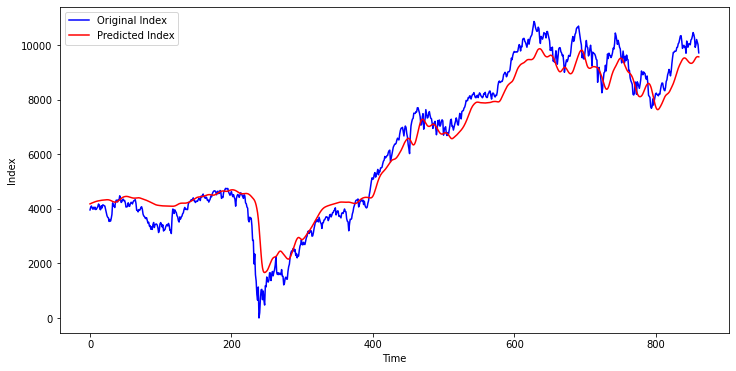

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Index')
plt.plot(y_predicted, 'r', label = 'Predicted Index')
plt.xlabel('Time')
plt.ylabel('Index')
plt.legend()
plt.show()

In [ ]:
len(data_testing)

862